Nerighbours and Distances

## Import necessary libraries

In [ ]:
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import numpy as np

## Synthetic Data

In [ ]:
X = np.array([[1,2], [3,4], [4,3], [8,7], [7,8], [25,80]])
X

array([[ 1,  2],
       [ 3,  4],
       [ 4,  3],
       [ 8,  7],
       [ 7,  8],
       [25, 80]])

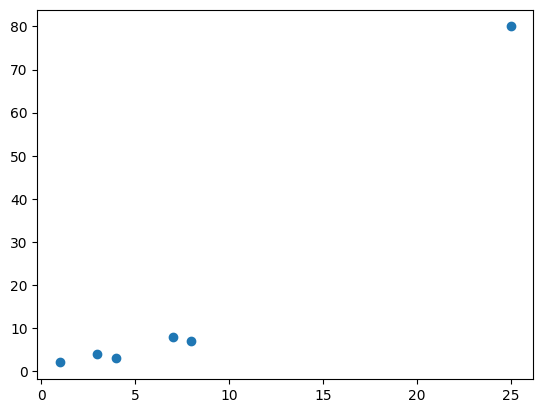

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## Not settting the hyperparameters (all default)

In [ ]:
dbscan = DBSCAN()
dbscan.fit_predict(X)
dbscan.labels_

array([-1, -1, -1, -1, -1, -1])

## Tune the hyperparameters **eps** and **min_samples**

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit_predict(X)
dbscan.labels_

array([ 0,  0,  0,  1,  1, -1])

In [ ]:
dbscan = DBSCAN(eps=9, min_samples=2)
dbscan.fit_predict(X)
dbscan.labels_

array([ 0,  0,  0,  0,  0, -1])

## Important Difference with K-means

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 4.6,  4.8],
       [25. , 80. ]])

In [ ]:
kmeans.predict([[24, 81], [23, 85]])

array([1, 1], dtype=int32)

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import seaborn as sns

In [ ]:
samples = [[0., 0., 0.], [0., 0.5, 0.], [1., 1., 0.5]]

neigh = NearestNeighbors(n_neighbors=1)

neigh.fit(samples)

NearestNeighbors(n_neighbors=1)

Which data point is closest to a given data point

In [ ]:
neigh.kneighbors([[0.0, 0.4, 0.0]])

(array([[0.1]]), array([[1]]))

In [ ]:
neigh.kneighbors([[0.1, 0.0, 0.1]])

(array([[0.14142136]]), array([[0]]))

In [ ]:
distance, indices = neigh.kneighbors([[0.1, 0.0, 0.1]])

In [ ]:
distance

array([[0.14142136]])

In [ ]:
indices

array([[0]])

Retry

In [ ]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5], [1.2, 1.2, 1.5]]
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(samples)

distance, indices = neigh.kneighbors([[0.0, 0.5, 0.0]])
#distance, indices = neigh.kneighbors([[0.1, 0, 0.1]])

print(distance)
print(indices)

[[0.  0.5]]
[[1 0]]


# Optimal Value of Epsilon

## Generate data synthetically

In [ ]:
X, y = make_blobs(n_samples=200,
                  centers=4,
                  cluster_std=0.60,
                  random_state=0)


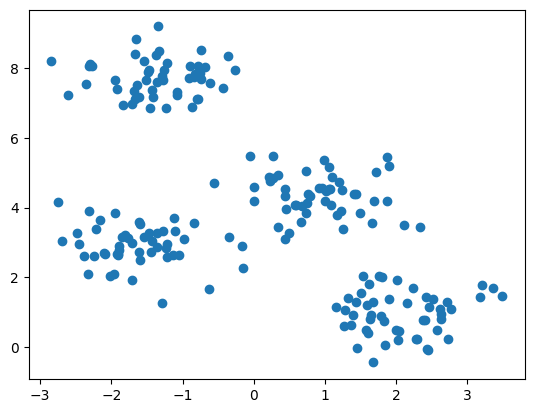

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## Finding suitable values for min_samples and eps

In [ ]:
neigh = NearestNeighbors(n_neighbors=4) # we have two features
                                        # 2x2=4

nbrs = neigh.fit(X)

distances, indices = nbrs.kneighbors(X)


In which distance range most of the data points are falling.
For which value along the y-asix, there is a sharp rise in the plot.
As shown below, it is around 0.4.

We start applying DBSCAN with a smaller value (e.g. 0.3, then use 0.4 then 0.5 etc.) and compute the silhouette score to estimate the goodness of fit.


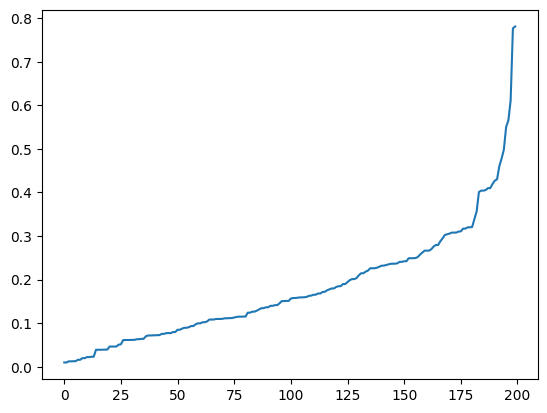

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

## Apply DBSCAN

### Set eps to 0.3

In [ ]:
dbscancluster = DBSCAN(eps=0.3, min_samples=5)
dbscancluster.fit(X)

DBSCAN(eps=0.3)

In [ ]:
clusters = dbscancluster.labels_

In [ ]:
print(len(set(clusters)))

11


In [ ]:
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [ ]:
print(clusters)

[-1  0  1 -1 -1 -1  0 -1 -1  1  1 -1  0 -1 -1 -1  2  2  2  8  2 -1  9  0
  3  4 -1  4 -1  1 -1  1  0  3  0 -1  0  1 -1  2 -1  2  5  1 -1  0 -1 -1
  2  1  2  0 -1 -1 -1  2  0 -1 -1  3 -1  1 -1  1  2  1  7 -1 -1  0  9  4
 -1 -1  0 -1  0 -1 -1 -1  2 -1  3 -1  0 -1 -1  9  0 -1  5 -1  2  6 -1  7
  0  2 -1  6  5 -1 -1  2  5  0  1  3  3  1 -1  0  0  7 -1  1 -1  0 -1 -1
 -1 -1  1 -1  1 -1 -1  0  4  1 -1  8 -1  5  5  0  5 -1  9 -1 -1  0 -1  7
 -1 -1  1  3 -1 -1  2  2 -1  0  7  6  2  0  5  8 -1  3  3 -1  0 -1 -1  4
 -1 -1  8 -1 -1 -1 -1  2  6 -1  0 -1 -1  9  1  4  1 -1 -1  2  6  5  4 -1
  1 -1  0  0  0  1 -1  8]


In [ ]:
silhouette_score(X, clusters)

0.006404075981596775

## Retry by setting eps to 0.4

In [ ]:
dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan.fit(X)
clusters = dbscan.labels_

print(len(set(clusters)))
print(np.unique(clusters))
print(clusters)

print(silhouette_score(X, clusters))

5
[-1  0  1  2  3]
[ 3  0  1 -1  3 -1  0 -1 -1  1  1  3  0  0 -1 -1  2  2  2  3  2  0  3  0
  3  3  2  3  3  1  2  1  0  3  0 -1  0  1  1  2  2  2  2  1  3  0  1 -1
  2  1  2  0 -1  2 -1  2  0  3 -1  3 -1  1  3  1  2  1  3 -1 -1  0  3  3
  1 -1  0  2  0 -1 -1  3  2  1  3 -1  0 -1  1  3  0 -1  2  2  2  1  1  3
  0  2 -1  1  2  3 -1  2  2  0  1  3  3  1 -1  0  0  3 -1  1 -1  0  2 -1
  2 -1  1  3  1 -1  1  0  3  1 -1  3 -1  2  2  0  2 -1  3 -1  3  0  3  3
 -1  3  1  3 -1 -1  2  2  1  0  3  1  2  0  2  3 -1  3  3  0  0 -1  1  3
 -1 -1  3 -1  0 -1  2  2  1 -1  0 -1 -1  3  1  3  1 -1 -1  2  1  2  3 -1
  1  2  0  0  0  1  2  3]
0.4225129353384709


## Retry by setting eps to 0.5

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
clusters = dbscan.labels_

print(len(set(clusters)))
print(np.unique(clusters))
print(clusters)

print(silhouette_score(X, clusters))

5
[-1  0  1  2  3]
[ 0  1  2 -1  0  2  1 -1 -1  2  2  0  1  1  0 -1  3  3  3  0  3  1  0  1
  0  0  3  0  0  2  3  2  1  0  1 -1  1  2  2  3  3  3  3  2  0  1  2 -1
  3  2  3  1  1  3 -1  3  1  0 -1  0  3  2  0  2  3  2  0 -1  1  1  0  0
  2  2  1  3  1  1  0  0  3  2  0 -1  1  2  2  0  1 -1  3  3  3  2  2  0
  1  3 -1  2  3  0  0  3  3  1  2  0  0  2 -1  1  1  0 -1  2 -1  1  3  2
  3 -1  2  0  2  1  2  1  0  2  1  0 -1  3  3  1  3  3  0  3  0  1  0  0
 -1  0  2  0 -1 -1  3  3  2  1  0  2  3  1  3  0 -1  0  0  1  1  3  2  0
  0  1  0  2  1  3  3  3  2 -1  1 -1 -1  0  2  0  2 -1 -1  3  2  3  0  0
  2  3  1  1  1  2  3  0]
0.5506633757011048
